In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

0

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else: 
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

<function matplotlib.pyplot.show(close=None, block=None)>

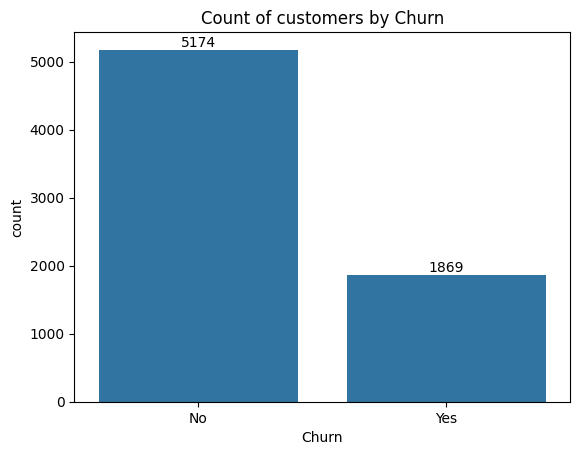

In [34]:
ax = sns.countplot(x= "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show

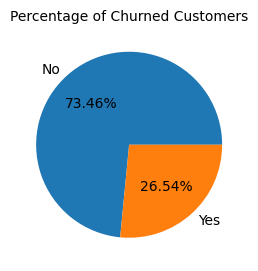

In [36]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb["Churn"], labels = gb.index, autopct= "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#from the above pie chart we can conclude that 26.54% of our customers have churned out. Now let's explore the reason behind it

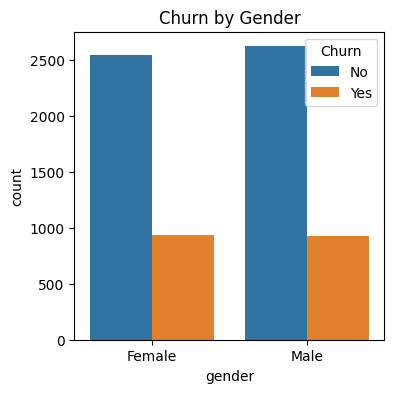

In [40]:
plt.figure(figsize = (4,4))
sns.countplot(x= "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")

plt.show()

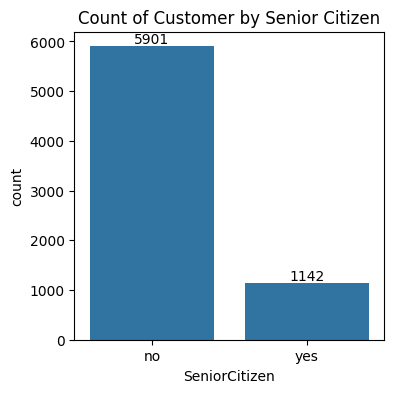

In [10]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Senior Citizen")

plt.show()

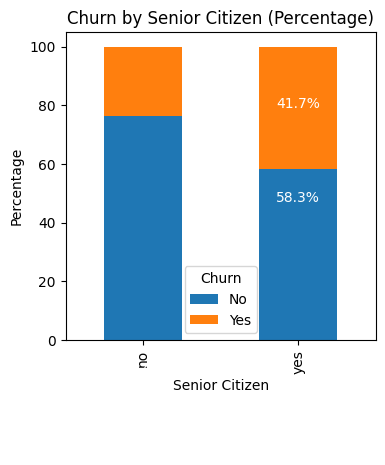

In [11]:
churn_counts = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot a stacked bar chart
churn_counts.plot(kind='bar', stacked=True, figsize=(4, 4), color=['#1f77b4', '#ff7f0e'])
plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")

# Add percentages on the bars
for i in range(len(churn_counts)):
    for j, val in enumerate(churn_counts.iloc[i]):
        plt.text(i, churn_counts.iloc[:i, :j+1].sum().sum() - val / 2, f'{val:.1f}%', ha='center', color='white')

plt.legend(title="Churn")
plt.show()

#comaparative a greater percentage of people in senior citizen category have churned.

<function matplotlib.pyplot.show(close=None, block=None)>

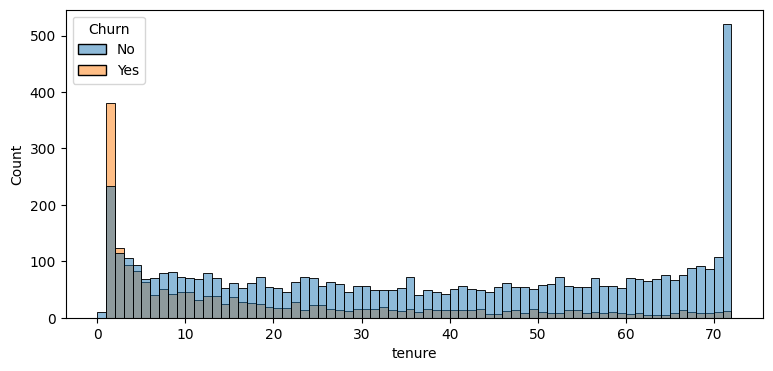

In [20]:
plt.figure(figsize= (9,4))
sns.histplot(x= "tenure", data = df, bins = 72, hue = "Churn")
plt.show

#People who have used ouyr services for a long time have stayed and people who used our services for one or 2 months churned out.

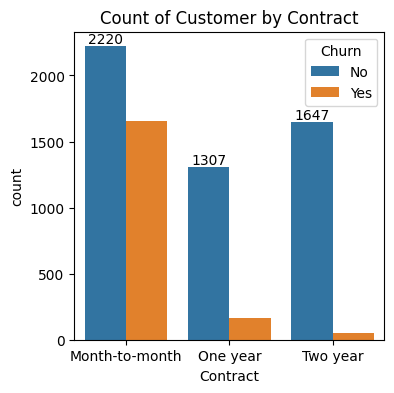

In [24]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")

plt.show()

#People who have month to month contract are likely to churn than from who have 1 or 2 yrs of contract.

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

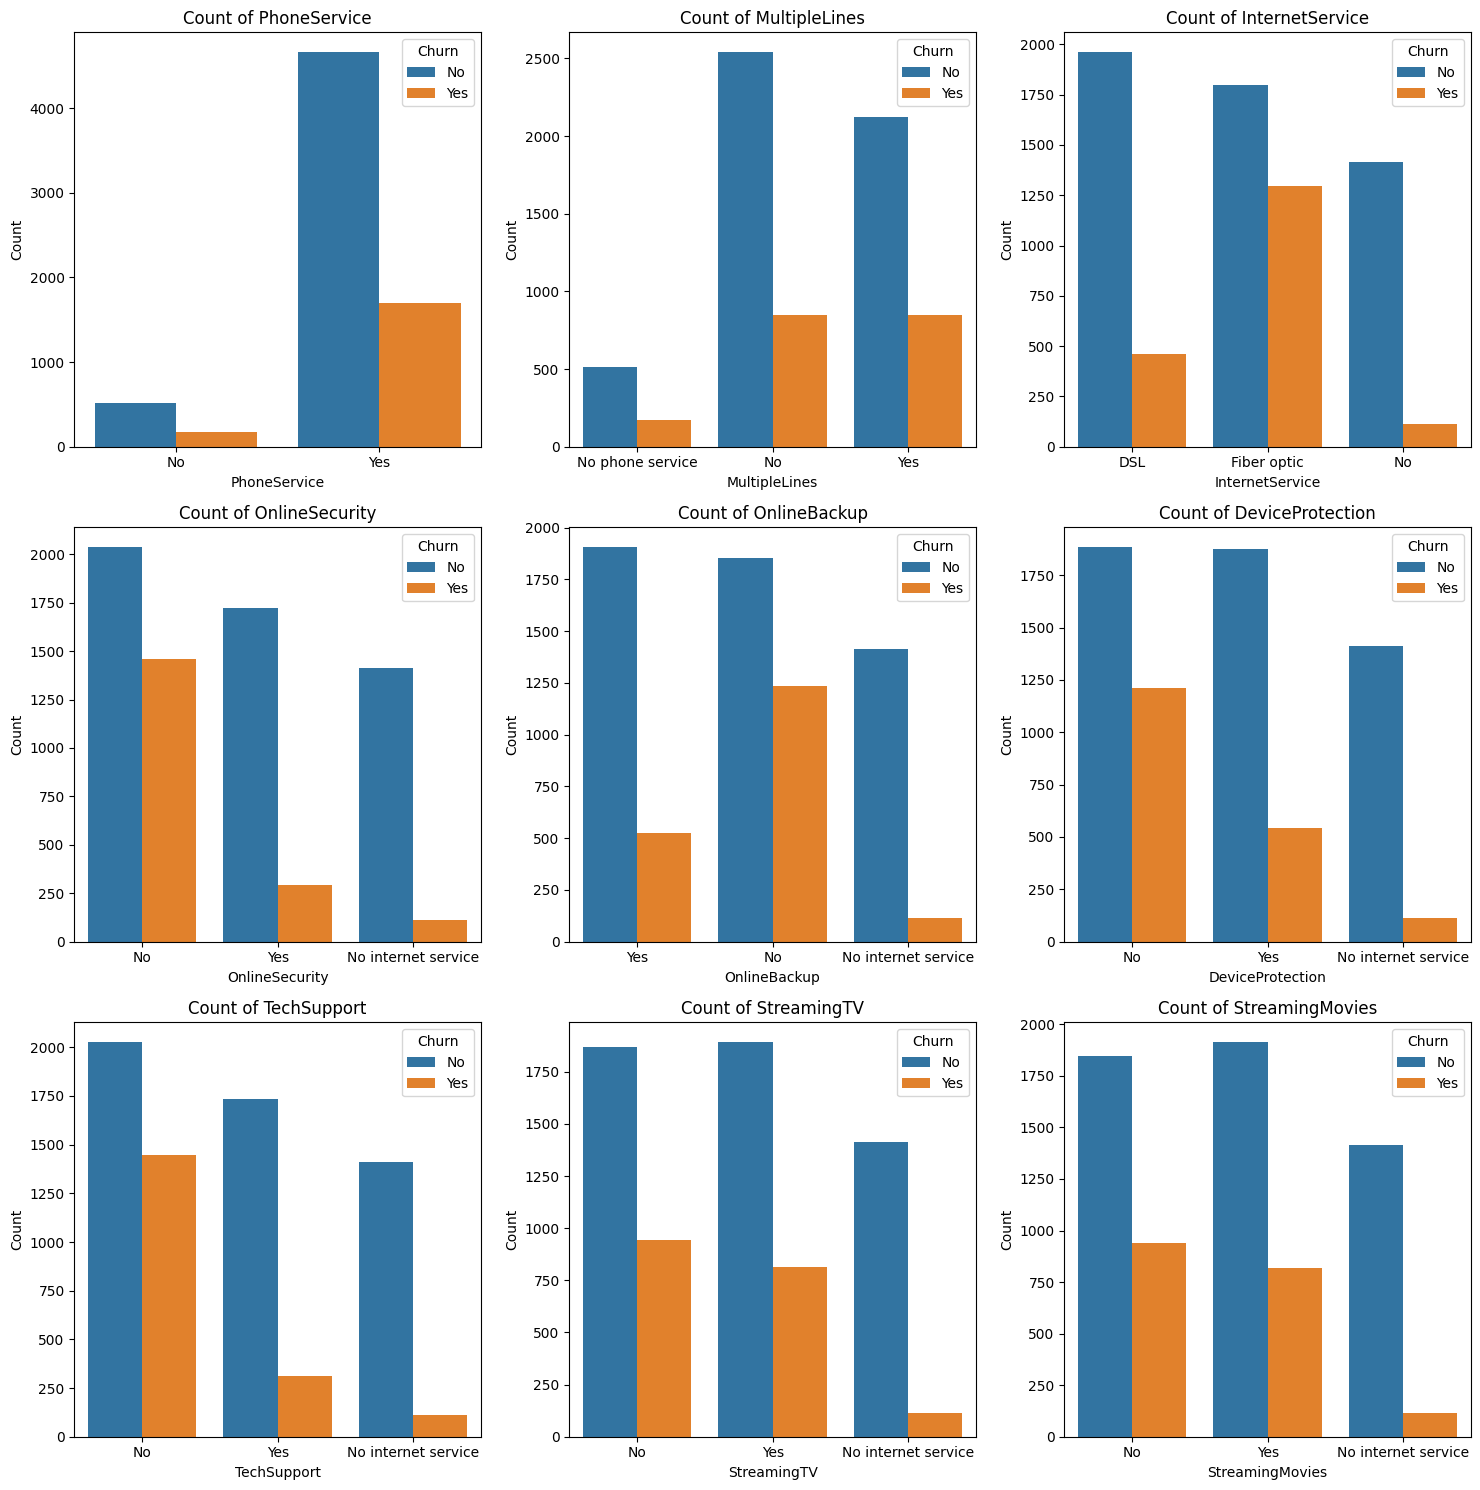

In [29]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine the grid size (3 rows by 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust figsize as needed

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a count plot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn")
    axes[i].set_title(f'Count of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

#Customers with "No" for services like TechSupport, OnlineSecurity, and StreamingTV tend to have a higher churn rate compared to those with these services enabled. Similarly, customers using Fiber optic InternetService show a higher churn rate compared to those on DSL or without internet service.

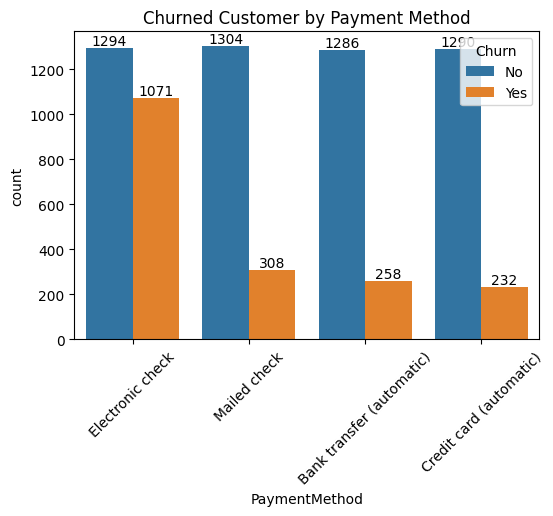

In [36]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x= "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customer by Payment Method")

plt.show()

#customer is likely to churn when they are using Electromic check.